# Best Days to Host an Outdoor Party at the Code Louisville Office

Libraries

In [2]:
import requests
import pandas as pd
import sqlite3
from datetime import date
import calendar
import matplotlib.pyplot as plt

In [32]:
DS_API_KEY = "00b999d3b38cbf3fd6f7c14b01244f79"
LAT = 38.2535367
LONG = -85.7481863

# loop to pull all dates to target for project

In [33]:
# Returns all Saturdays, Sundays, and Holiday Mondays in 2019
potential_dates = []
year = 2019
c = calendar.TextCalendar(calendar.SUNDAY)
for m in range(1,13):
    for i in c.itermonthdays(year,m):
        if i != 0:                                      #calendar constructs months with leading zeros (days belongng to the previous month)
            day = date(year,m,i)
            if day.weekday() == 0:
                if m == 2 and 15<= i <= 21: #third Monday
                    potential_dates.append("{}-0{}-{}, President's Day".format(year,m,i))
                if m == 5 and 25 <= i <=31: #last monday of May
                    potential_dates.append("{}-0{}-{}, Memorial Day".format(year,m,i))
                if m == 9 and 1 <= i <=7: #1st Monday
                    potential_dates.append("{}-0{}-0{}, Labor Day".format(year,m,i))
                if m == 10 and 8 <= i <=14: #2nd Monday
                    potential_dates.append("{}-{}-{}, Columbus Day*".format(year,m,i))
                if m == 10 and 22 <= i <=28: #4th Monday
                    potential_dates.append("{}-{}-{}, Veterans Day".format(year,m,i))
            if day.weekday() == 5 or day.weekday() == 6: #if its Saturday or Sunday
                if m < 10:
                    if i < 10:
                        potential_dates.append("{}-0{}-0{}".format(year,m,i))
                    else:
                        potential_dates.append("{}-0{}-{}".format(year,m,i))
                elif m > 9 and i <10:
                    potential_dates.append("{}-{}-0{}".format(year,m,i))
                else:
                    potential_dates.append("{}-{}-{}".format(year,m,i))
 


print(potential_dates)

['2019-01-05', '2019-01-06', '2019-01-12', '2019-01-13', '2019-01-19', '2019-01-20', '2019-01-26', '2019-01-27', '2019-02-02', '2019-02-03', '2019-02-09', '2019-02-10', '2019-02-16', '2019-02-17', "2019-02-18, President's Day", '2019-02-23', '2019-02-24', '2019-03-02', '2019-03-03', '2019-03-09', '2019-03-10', '2019-03-16', '2019-03-17', '2019-03-23', '2019-03-24', '2019-03-30', '2019-03-31', '2019-04-06', '2019-04-07', '2019-04-13', '2019-04-14', '2019-04-20', '2019-04-21', '2019-04-27', '2019-04-28', '2019-05-04', '2019-05-05', '2019-05-11', '2019-05-12', '2019-05-18', '2019-05-19', '2019-05-25', '2019-05-26', '2019-05-27, Memorial Day', '2019-06-01', '2019-06-02', '2019-06-08', '2019-06-09', '2019-06-15', '2019-06-16', '2019-06-22', '2019-06-23', '2019-06-29', '2019-06-30', '2019-07-06', '2019-07-07', '2019-07-13', '2019-07-14', '2019-07-20', '2019-07-21', '2019-07-27', '2019-07-28', '2019-08-03', '2019-08-04', '2019-08-10', '2019-08-11', '2019-08-17', '2019-08-18', '2019-08-24', '2

In [34]:
len(potential_dates)

109

# API call with nested *Summary* data to SQL DB and .csv

In [35]:
import requests
import pandas as pd
import sqlite3

DS_API_KEY = "00b999d3b38cbf3fd6f7c14b01244f79"
LAT = "38.2535367"
LONG = "-85.7481863"

def request_loop(list,year,years_back):
    starting_year = int(year)- years_back
    ending_year = int(year)
    mm_dd_list =[]
    year_list =[]
    #pull out list item by index
    for target_day in list:
        if len(target_day)> 10:
            mm_dd = target_day[5:10]
        else:
            mm_dd = target_day[5:]
        for year in range(starting_year, ending_year):
            try:
                dark_sky_request = requests.get("https://api.darksky.net/forecast/" + DS_API_KEY + "/" + LAT +"," + LONG + "," + str(year) + "-" + mm_dd + "T00:00:00?exclude=currently,flags,alerts")
                if target_day == list[0] and year == starting_year:
                    weather_summary_dataframe = pd.DataFrame.from_dict(dark_sky_request.json()['daily']['data'], orient = 'columns')
                else:
                    weather_summary_dataframe = weather_summary_dataframe.append(pd.DataFrame.from_dict(dark_sky_request.json()['daily']['data'], orient = 'columns'))
                mm_dd_list.append(mm_dd)
                year_list.append(str(year))
            except KeyError:
                print(str(year)+ '-' + mm_dd)
                continue
    weather_summary_dataframe["MM_DD"]= mm_dd_list
    weather_summary_dataframe["Year"]= year_list
    weather_summary_dataframe.to_csv('weather_summary_dataframe.csv')
    weather_summary_dataframe.to_sql("weather summary",sqlite3.connect("Weather_summary.db"), if_exists ="replace")
    return weather_summary_dataframe
    

request_loop(potential_dates,2019,10)

C:\Users\james\Anaconda3\lib\site-packages\pandas\core\frame.py:6211: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


,apparentTemperatureHigh,apparentTemperatureHighTime,apparentTemperatureLow,apparentTemperatureLowTime,apparentTemperatureMax,apparentTemperatureMaxTime,apparentTemperatureMin,apparentTemperatureMinTime,cloudCover,dewPoint,...,time,uvIndex,uvIndexTime,visibility,windBearing,windGust,windGustTime,windSpeed,MM_DD,Year
0,33.56,1231189200,30.57,1231214400,33.56,1231189200,23.05,1231160400,0.98,24.15,...,1231131600,2,1231174800,9.46,9,10.92,1231138800,2.51,01-05,2009
0,19.43,1262732400,11.10,1262757600,19.54,1262743200,3.92,1262692800,0.71,8.44,...,1262667600,2,1262710800,9.21,280,14.39,1262721600,5.13,01-05,2010
0,36.80,1294257600,26.28,1294318800,36.80,1294257600,19.57,1294232400,0.50,16.30,...,1294203600,2,1294246800,9.96,125,3.58,1294257600,0.09,01-05,2011
0,54.80,1325797200,40.14,1325851200,54.80,1325797200,28.75,1325768400,0.07,26.75,...,1325739600,2,1325782800,10.00,207,13.26,1325797200,2.99,01-05,2012
0,45.04,1357412400,36.93,1357477200,45.04,1357412400,23.11,1357387200,0.43,25.00,...,1357362000,2,1357405200,9.29,207,8.83,1357405200,1.09,01-05,2013
0,54.30,1388948400,-13.89,1389013200,54.30,1388948400,13.76,1388980800,0.96,32.67,...,1388898000,2,1388941200,8.23,246,24.33,1388977200,1.62,01-05,2014
0,24.81,1420491600,22.60,1420513200,24.81,1420491600,10.47,1420462800,0.24,8.98,...,1420434000,2,1420477200,10.00,282,13.06,1420434000,2.27,01-05,2015
0,37.79,1452027600,20.80,1452074400,37.79,1452027600,16.41,1452002400,0.00,17.74,...,1451970000,2,1452013200,10.00,78,6.50,1452016800,1.67,01-05,2016
0,25.38,1483635600,11.89,1483682400,25.38,1483635600,19.04,1483675200,0.97,16.76,...,1483592400,2,1483635600,6.71,319,7.16,1483675200,1.48,01-05,2017
0,20.01,1515186000,-0.17,1515243600,20.01,1515186000,8.54,1515135600,0.66,0.59,...,1515128400,2,1515171600,10.00,294,7.56,1515182400,1.68,01-05,2018


In [36]:
all_weather = sqlite3.connect("Weather_summary.db")
potential_days = pd.read_sql_query("SELECT MM_DD, Year, apparentTemperatureHigh, apparentTemperatureLow, precipAccumulation FROM 'weather summary'",all_weather)
potential_days

,MM_DD,Year,apparentTemperatureHigh,apparentTemperatureLow,precipAccumulation
0,01-05,2009,33.56,30.57,NaN
1,01-05,2010,19.43,11.10,NaN
2,01-05,2011,36.80,26.28,NaN
3,01-05,2012,54.80,40.14,NaN
4,01-05,2013,45.04,36.93,NaN
5,01-05,2014,54.30,-13.89,NaN
6,01-05,2015,24.81,22.60,NaN
7,01-05,2016,37.79,20.80,NaN
8,01-05,2017,25.38,11.89,0.041
9,01-05,2018,20.01,-0.17,NaN


In [24]:
precip_days = pd.read_sql_query("SELECT MM_DD,precipAccumulation FROM 'weather summary'",all_weather)
precip_count = precip_days.groupby('MM_DD').count()
precip_count.head()

,precipAccumulation
MM_DD,
01-05,1
01-06,0
01-12,1
01-13,1
01-19,0


In [23]:
hi_low_days = pd.read_sql_query("SELECT MM_DD, apparentTemperatureHigh, apparentTemperatureLow FROM 'weather summary'",all_weather)
avg_hi_low_days = hi_low_days.groupby('MM_DD').mean()
avg_hi_low_days.head()

,apparentTemperatureHigh,apparentTemperatureLow
MM_DD,,
01-05,35.192,18.625
01-06,30.790,16.188
01-12,41.668,24.698
01-13,34.858,22.158
01-19,41.471,29.881


In [25]:
#avg_days = avg_hi_days.merge(avg_low_days, on ='MM_DD')
avg_days_precip_count = avg_hi_low_days.merge(precip_count, on ='MM_DD')
avg_days_precip_count.head()

,apparentTemperatureHigh,apparentTemperatureLow,precipAccumulation
MM_DD,,,
01-05,35.192,18.625,1
01-06,30.790,16.188,0
01-12,41.668,24.698,1
01-13,34.858,22.158,1
01-19,41.471,29.881,0


In [30]:
ideal_days = avg_hi_low_days.loc[(avg_hi_low_days.apparentTemperatureHigh < 80) & (avg_hi_low_days.apparentTemperatureLow > 50)] 
ideal_days

,apparentTemperatureHigh,apparentTemperatureLow
MM_DD,,
04-13,73.729,52.471
04-14,71.516,52.751
04-27,69.530,52.371
04-28,70.164,52.221
05-04,71.899,53.745
05-05,70.868,54.012
05-12,76.665,57.290
05-18,72.775,56.505
05-19,78.245,58.618


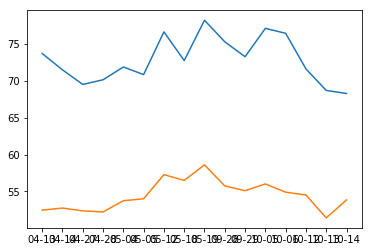

In [20]:
plt.plot(ideal_days)

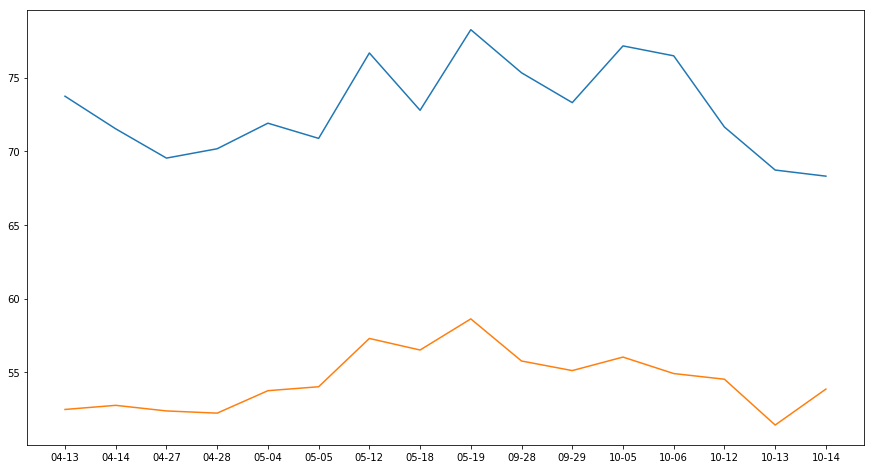

In [29]:
fig, ax = plt.subplots(figsize = (15,8))
#ax.bar(ideal_days.)
ax.plot(ideal_days)
#Add X,Y labels
#Add bar chart for precipitation events
